# 2. &nbsp; Hysteretic oscillators

The one-way switch discussed previously can be extended to become either an activator-inhibitor or a substrate-depletion oscillator.

In case of the one-way switch, the signal $S$ enhances production of $R$ which itself activates the conversion of the enzyme $E$ into its active form $E^*$, and $E^*$ enhances production of $R$. This mutual activation between $R$ and $E^*$ results in a positive feedback. If the conversion of $E$ is fast, such that the reaction is in a quasi-steady state, then the fraction of active enzyme
can be expressed by the Goldbeter-Koshland function:

$$
E^*/E_{tot} = G(k_3R, k_4, J_3 = K_{m3} / E_{tot}, J_4 = K_{m4} / E_{tot})
$$


In [219]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
def goldbeter_koshland(u_1, u_2, J_1, J_2):
    B = u_2 - u_1 + J_1 * u_2 + J_2 * u_1
    return (2 * u_1 * J_2) / (B + np.sqrt(B**2 - 4 * (u_2 - u_1) * u_1 * J_2))

def ode_1(t, y, k_0_prime, k_0, k_1, k_2, k_3, k_4, J_3, J_4, S, E_T):
    Ep_gk = goldbeter_koshland(k_3 * y[1], k_4, J_3, J_4)
    dydt = np.array([
        k_1 * S - y[0] * (k_0_prime + k_0 * Ep_gk),
        y[0] * (k_0_prime + k_0 * Ep_gk) - k_2 * y[1]
    ])
    return dydt

def ode_2(t, y, k_2_prime, k_0, k_1, k_2, k_3, k_4, k_5, k_6, J_3, J_4, S, E_T):
    Ep_gk = goldbeter_koshland(k_3 * y[1], k_4, J_3, J_4)
    dydt = np.array([
        k_5 * y[1] - k_6 * y[0],
        k_1 * S + k_0 * Ep_gk - y[1] * (k_2 + k_2_prime * y[0])
    ])
    return dydt

# FIGURE INITIALIZATION
fig = plt.figure(figsize=(12, 6), dpi=300)
gs = plt.GridSpec(1, 2)

## (a) &nbsp; Substrate-depletion oscillators
A substrate-depletion oscillator is obtained if the signal $S$ enhances the production of a substrate $X$ which is converted into the response $R$.

In [ ]:
k_0_prime = 0
k_0 = 0.4
k_1 = 1
k_2 = 1
k_3 = 1
k_4 = 0.4
J_3 = 0.5
J_4 = 0.5
S = 0.2
E_T = 1

p = [k_0_prime, k_0, k_1, k_2, k_3, k_4, J_3, J_4, S, E_T]

# NULLCLINES
r_linspace = np.linspace(0.01, 1.2, 100)
Ep_gk_r = goldbeter_koshland(k_3 * r_linspace, k_4, J_3, J_4)
r_nullcline = (k_2 * r_linspace) / (k_0_prime + k_0 * Ep_gk_r)

r_linspace_2 = np.linspace(0.1035, 1.2, 100)
Ep_gk_r_2 = goldbeter_koshland(k_3 * r_linspace_2, k_4, J_3, J_4)
x_nullcline = (k_1 * S) / (k_0_prime + k_0 * Ep_gk_r_2)

# QUIVER PLOT
X, R = np.meshgrid(np.linspace(0, 5, 30), np.linspace(0, 1.2, 30))
Ep_gk = goldbeter_koshland(k_3 * R, k_4, J_3, J_4)
dXdt = k_1 * S - X * (k_0_prime + k_0 * Ep_gk)
dRdt = X * (k_0_prime + k_0 * Ep_gk) - k_2 * R
magnitude = np.sqrt(dXdt**2 + dRdt**2)

# GENERAL PARAMETERS
t_span = [0, 100]  # time span
t_eval = np.linspace(*t_span, 2000)  # time points for plotting

results_1 = solve_ivp(ode_1, t_span, [1.0, 0.2], t_eval=t_eval, args=p)
results_2 = solve_ivp(ode_1, t_span, [0.5, 0.3], t_eval=t_eval, args=p)

# PLOTTING
ax = fig.add_subplot(gs[0, 0])
ax.quiver(X, R, dXdt, dRdt, magnitude, scale=40, cmap="viridis_r", label="vector field")

ax.plot(x_nullcline, r_linspace_2, label="$dX/dt$ nullcline")
ax.plot(r_nullcline, r_linspace, label="$dR/dt$ nullcline")

ax.plot(results_1.y[0], results_1.y[1], color="black", linestyle="dashed", label="trajectories")
ax.plot(results_2.y[0], results_2.y[1], color="black", linestyle="dashed")

ax.set_xlabel("$X$")
ax.set_ylabel("$R$")
ax.set_title("Substrate-depletion oscillator $(X, R)$ phase plane")
ax.legend()

## (b) &nbsp; Activator-inhibitor oscillators
An activator-inhibitor oscillator is obtained if $R$ enhances the production of a factor $X$ that enhances the degradation of $R$.

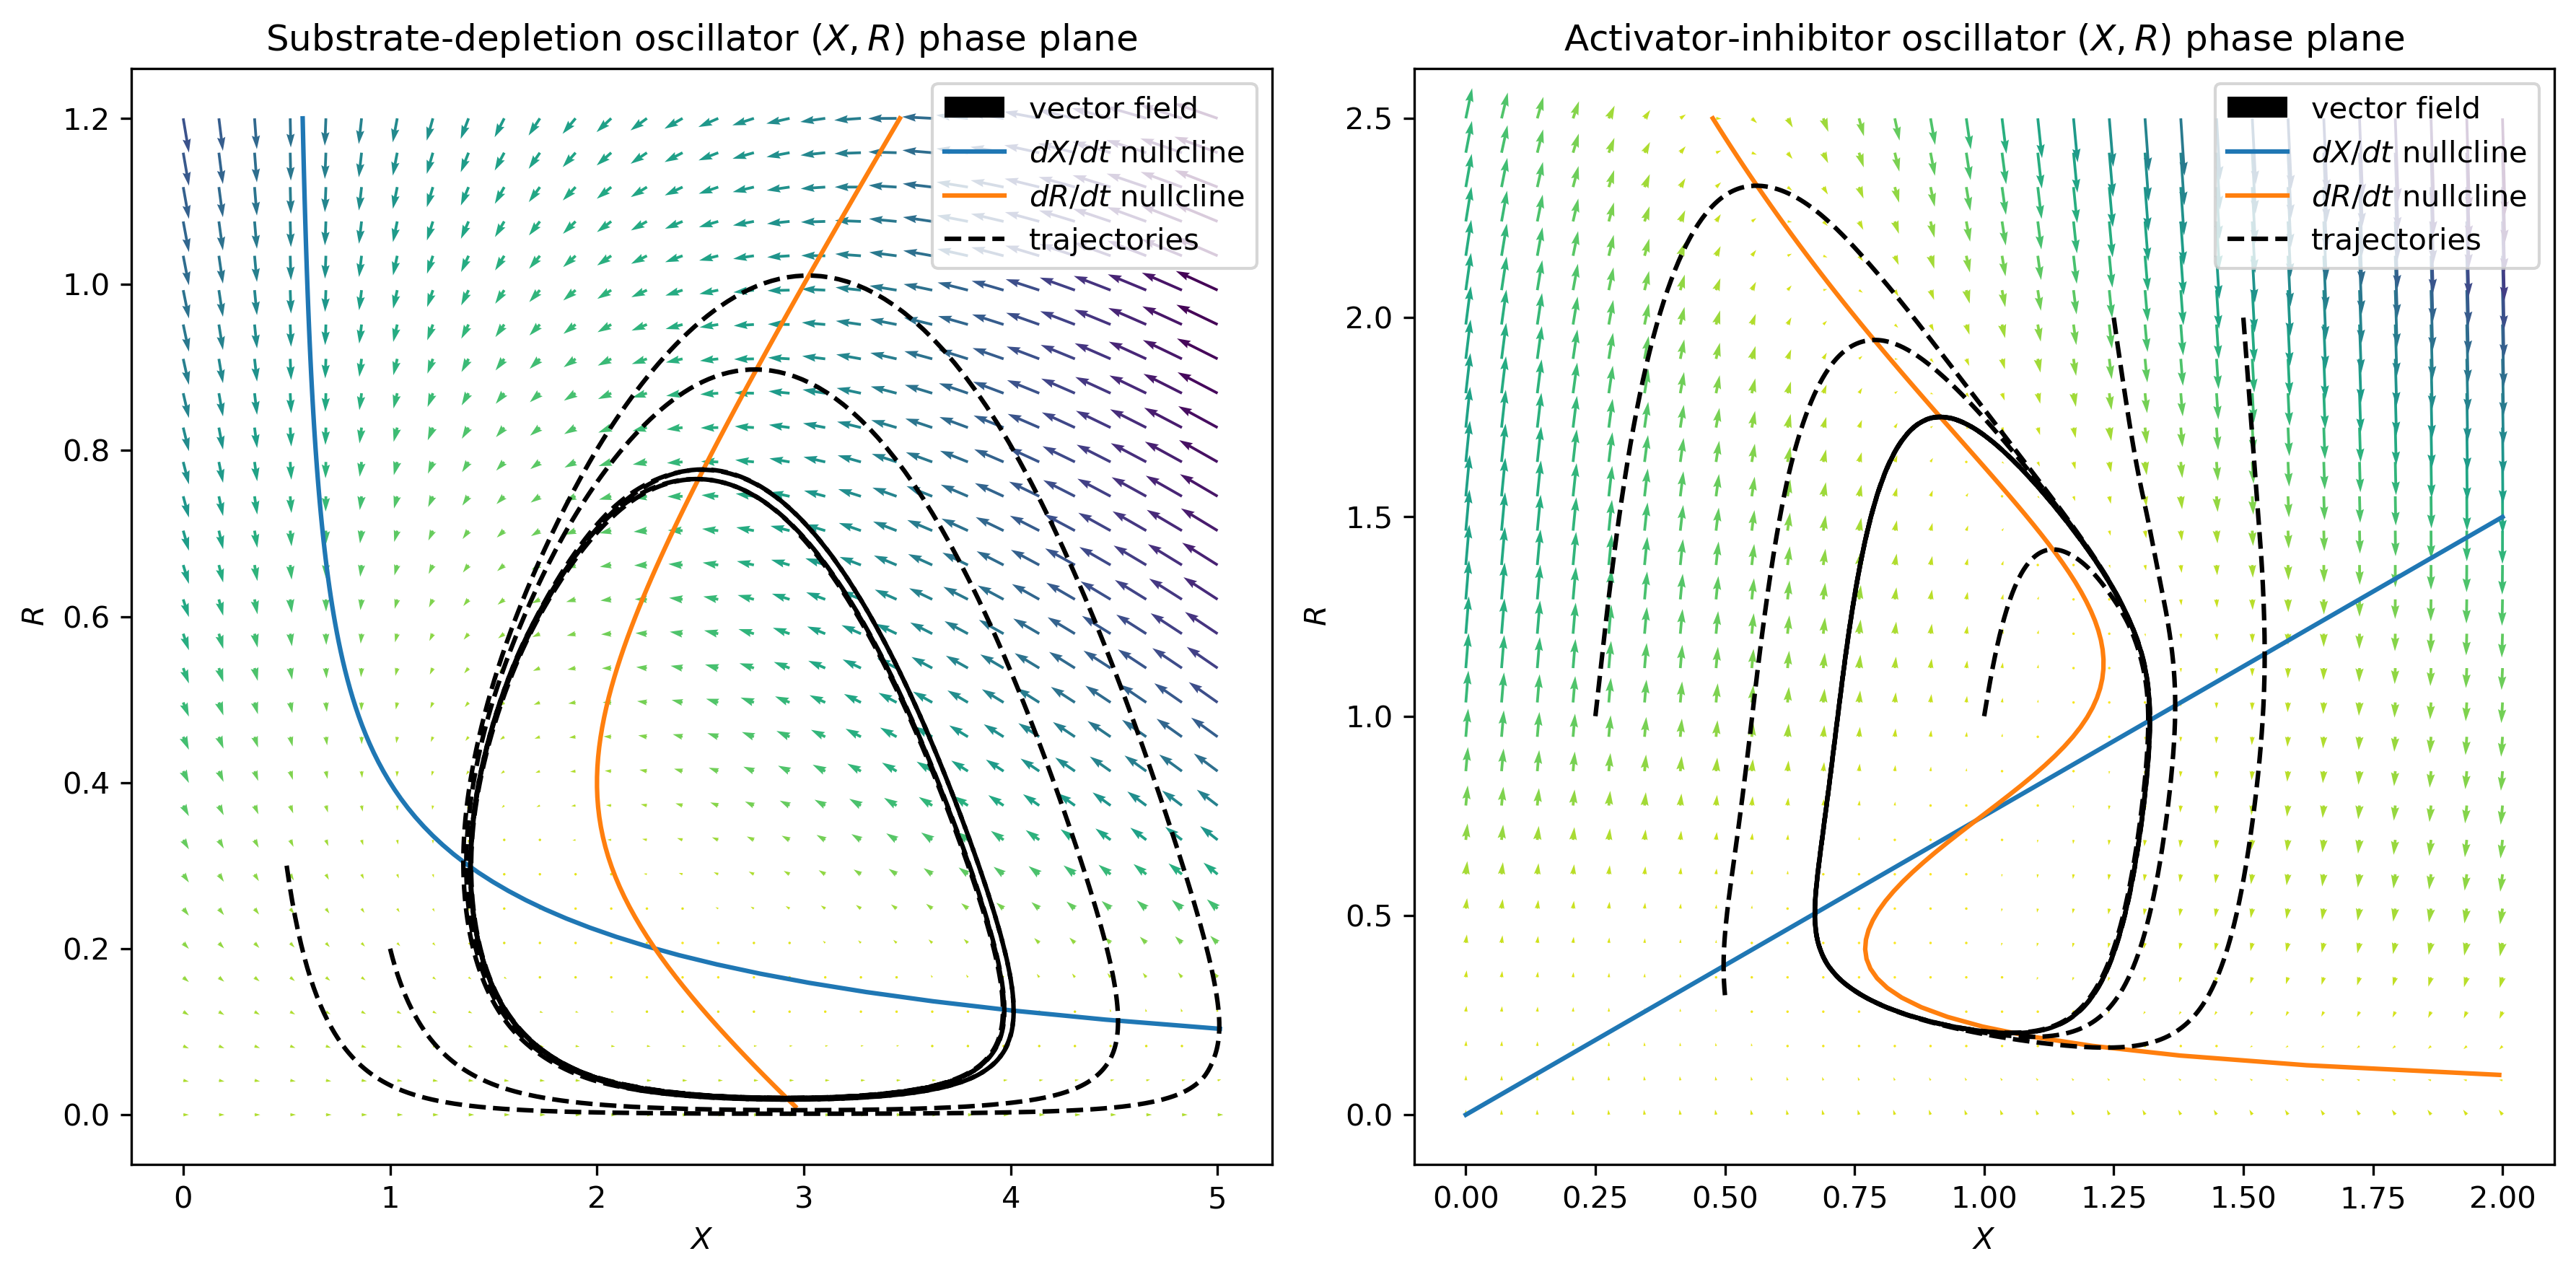

In [222]:
k_2_prime = 1
k_0 = 4
k_1 = 1
k_2 = 1
k_3 = 1
k_4 = 1
k_5 = 0.1
k_6 = 0.075
J_3 = 0.3
J_4 = 0.3
S = 0.2
E_T = 1

p = [k_2_prime, k_0, k_1, k_2, k_3, k_4, k_5, k_6, J_3, J_4, S, E_T]

# NULLCLINES:
x_linspace = np.linspace(0, 2, 100)
x_nullcline = (k_6 * x_linspace) / k_5  # plot against X, so 

r_linspace = np.linspace(0.1, 2.5, 100)
Ep_gk_r = goldbeter_koshland(k_3 * r_linspace, k_4, J_3, J_4)
r_nullcline = (k_1 * S + k_0 * Ep_gk_r) / (r_linspace * k_2_prime) - k_2 / k_2_prime

# QUIVER PLOT:
X, R = np.meshgrid(np.linspace(0, 2, 30), np.linspace(0, 2.5, 30))
Ep_gk = goldbeter_koshland(k_3 * R, k_4, J_3, J_4)
dXdt = k_5 * R - k_6 * X
dRdt = k_1 * S + k_0 * Ep_gk - R * (k_2 + k_2_prime * X)
magnitude = np.sqrt(dXdt**2 + dRdt**2)

# GENERAL PARAMETERS
t_span = [0, 40]  # time span
t_eval = np.linspace(*t_span, 2000)  # time points for plotting

results_1 = solve_ivp(ode_2, t_span, [1.5, 2.0], t_eval=t_eval, args=p)
results_2 = solve_ivp(ode_2, t_span, [0.5, 0.3], t_eval=t_eval, args=p)
results_3 = solve_ivp(ode_2, t_span, [0.25, 1.0], t_eval=t_eval, args=p)
results_4 = solve_ivp(ode_2, t_span, [1.25, 2.0], t_eval=t_eval, args=p)
results_5 = solve_ivp(ode_2, t_span, [1.0, 1.0], t_eval=t_eval, args=p)

ax = fig.add_subplot(gs[0, 1])
ax.quiver(X, R, dXdt, dRdt, magnitude, scale=45, cmap="viridis_r", label="vector field")

ax.plot(x_linspace, x_nullcline, label="$dX/dt$ nullcline")
ax.plot(r_nullcline, r_linspace, label="$dR/dt$ nullcline")

ax.plot(results_1.y[0], results_1.y[1], color="black", linestyle="dashed", label="trajectories")
ax.plot(results_2.y[0], results_2.y[1], color="black", linestyle="dashed")
ax.plot(results_3.y[0], results_3.y[1], color="black", linestyle="dashed")
ax.plot(results_4.y[0], results_4.y[1], color="black", linestyle="dashed")
ax.plot(results_5.y[0], results_5.y[1], color="black", linestyle="dashed")

ax.set_xlabel("$X$")
ax.set_ylabel("$R$")
ax.set_title("Activator-inhibitor oscillator $(X, R)$ phase plane")
ax.legend()

fig.tight_layout()
fig